# Hàm ghép trơn

<b>Xét bài toán:</b>

Cho bộ điểm $(x_i, y_i)_{i=1,n}$. Tìm hàm ghép
$$S(x) = S_k(x), x \in [x_k, x_{k+1}], \hspace{1cm} k=\bar{0, n-1}$$
thỏa mãn $S_k(x)$ là đa thức bậc $p$, $S(x)$ trơn đến cấp $p-1$ ($S(x) \in C^{p-1}[a,b])$.

### Import packages

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, expand

### Input chương trình

In [62]:
x = []
y = []
with open('input.txt', 'r+') as f:
    for line in f.readlines():
        xt = float(line.split(' ')[0])
        yt = float(line.split(' ')[1])
        check = True
        for x_check in x:
            if x_check == xt:
                check = False
                break
        if check:
            x.append(xt)
            y.append(yt)
x = np.array(x)
y = np.array(y)
h = np.diff(x)
n = len(x) - 1

## Spline cấp 1 ($p=1$)

Khi đó, $S_k=a_kx+b_k, \hspace{.3cm} x \in [x_k, x_{k+1}]$ là các đường thẳng

In [63]:
def Spline_1(loop_points):
    y_found = []
    
    for elm in loop_points:
        for i in range(1, n+1):
            if (x[i-1] <= elm <= x[i]):
                alpha = y[i-1]/h[i-1]
                beta  = y[i]/h[i-1]
                y_found.append(alpha*(x[i]-elm) + beta*(elm-x[i-1]))
                
    for i in range(1, n+1):
        alpha = y[i-1]/h[i-1]
        beta  = y[i]/h[i-1]
        bound = "S1["+str(x[i-1])+', '+str(x[i])+'] = '
        func  = str(round(alpha,3))+'('+str(x[i])+'-x)'+'+'+str(round(beta,3))+'(x-'+str(x[i-1])+')'
        print(bound + func)
    return y_found

S1[0.0, 0.52] = 0.0(0.52-x)+0.962(x-0.0)
S1[0.52, 1.05] = 0.943(1.05-x)+1.642(x-0.52)
S1[1.05, 1.57] = 1.673(1.57-x)+1.923(x-1.05)
S1[1.57, 2.09] = 1.923(2.09-x)+1.673(x-1.57)
S1[2.09, 2.62] = 1.642(2.62-x)+0.943(x-2.09)
S1[2.62, 3.14] = 0.962(3.14-x)+0.0(x-2.62)
S1[3.14, 3.66] = 0.0(3.66-x)+-0.962(x-3.14)
S1[3.66, 4.17] = -0.98(4.17-x)+-1.706(x-3.66)
S1[4.17, 4.71] = -1.611(4.71-x)+-1.852(x-4.17)
S1[4.71, 5.23] = -1.923(5.23-x)+-1.673(x-4.71)
S1[5.23, 5.76] = -1.642(5.76-x)+-0.943(x-5.23)
S1[5.76, 6.28] = -0.962(6.28-x)+0.0(x-5.76)


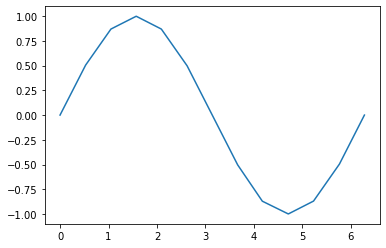

In [64]:
X  = np.linspace(x[0], x[n], 1000)
y1 = Spline_1(X)

plt.plot(X, y1)
plt.show()

## Spline cấp 2 ($p=2$)

Ta có bộ điểm $\{(x_k, y_k)\}_{k=\bar{0, n}}$, gồm 2 điểm biên và $n-1$ điểm nối

$$S(x)=
-\frac{m_{j-1}}{2h_j}(x_j-x)^2 +
\frac{m_j}{2h_j}(x-x_{j-1})^2 +
(y_j - \frac{m_j}{2}h_j)
$$

In [71]:
def Spline_2(loop_points):
    y_found = []
    m = np.empty(n+1)
    
    m[0]=(y[1]-y[0])/h[0]
    for i in range(1,n+1):
        m[i]=2/h[i-1]*(y[i]-y[i-1])-m[i-1]
    
    for elm in loop_points:
        for i in range(1, n+1):
            if (x[i-1] <= elm <= x[i]):
                p1 = (-m[i-1]/(2*h[i-1])) * (x[i]-elm)**2
                p2 = (m[i]/(2*h[i-1]))    * (elm-x[i-1])**2
                p3 = y[i] - (m[i]/2)*h[i-1]
                y_found.append(p1 + p2 + p3)
    
    for i in range(1, n+1):
        p1 = -m[i-1]/(2*h[i-1])
        p2 = (m[i]/(2*h[i-1]))
        p3 = y[i] - (m[i]/2)*h[i-1]
        bound = "S2["+str(x[i-1])+', '+str(x[i])+'] = '
        func  = str(round(p1,3)) +'('  + str(x[i])   + '-x)^2+'  + \
                str(round(p2,3)) +'(x-'+ str(x[i-1]) + ')^2'+'+' + \
                str(round(p3,3))
        print(bound + func)
    return y_found

S2[0.0, 0.52] = -0.925(0.52-x)^2+0.925(x-0.0)^2+0.25
S2[0.52, 1.05] = -0.907(1.05-x)^2+0.41(x-0.52)^2+0.755
S2[1.05, 1.57] = -0.418(1.57-x)^2+0.063(x-1.05)^2+0.983
S2[1.57, 2.09] = -0.063(2.09-x)^2+-0.544(x-1.57)^2+1.017
S2[2.09, 2.62] = 0.533(2.62-x)^2+-0.784(x-2.09)^2+0.72
S2[2.62, 3.14] = 0.799(3.14-x)^2+-1.05(x-2.62)^2+0.284
S2[3.14, 3.66] = 1.05(3.66-x)^2+-0.799(x-3.14)^2+-0.284
S2[3.66, 4.17] = 0.815(4.17-x)^2+-0.608(x-3.66)^2+-0.712
S2[4.17, 4.71] = 0.574(4.71-x)^2+0.128(x-4.17)^2+-1.037
S2[4.71, 5.23] = -0.133(5.23-x)^2+0.348(x-4.71)^2+-0.964
S2[5.23, 5.76] = -0.341(5.76-x)^2+0.976(x-5.23)^2+-0.774
S2[5.76, 6.28] = -0.995(6.28-x)^2+0.854(x-5.76)^2+-0.231


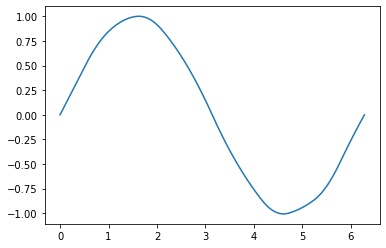

In [72]:
X  = np.linspace(x[0], x[n], 1000)
y2 = Spline_2(X)

plt.plot(X, y2)
plt.show()

## Spline cấp 3 $(p=3)$

$$S(x)=
\frac{m_{j-1}}{6h_j}(x_j-x)^3 +
\frac{m_j}{6h_j}(x-x_{j-1})^3 +
\frac{1}{h_j}(y_{j-1}-\frac{m_{j-1}}{6}h_j^2)(x_j-x) +
\frac{1}{h_j}(y_j-\frac{m_{j-1}}{6}h_j^2)(x-x_j)
$$

In [68]:
def m_coeff(x, y, n):
    m = np.empty(n+1)
    d = np.empty(n+1)
    anpha = np.empty(n+1)
    beta = np.empty(n+1)
    muy = np.empty(n+1)
    lamda = np.empty(n+1)
    h = np.diff(x)
    dh0 = (y[1]-y[0])/(x[1]-x[0])
    dhn = (y[n]-y[n-1])/(x[n]-x[n-1])
    d[0] = 6/h[0]*((y[1]-y[0])/h[0]-dh0)
    d[n] = 6/h[n-1]*(dhn-(y[n]-y[n-1])/h[n-1])
    anpha[1] = 1/(-2)
    beta[1] = d[0]/2
    for i in range(1,n):
        d[i] = 6*((y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1])/(h[i]+h[i-1])
    for i in range(1,n):
        muy[i] = h[i-1]/(h[i-1]+h[i])
        lamda[i] = h[i]/(h[i-1]+h[i])
    for i in range(1,n):
        anpha[i+1] = lamda[i]/(-2-anpha[i]*muy[i])
        beta[i+1] = (muy[i]*beta[i]-d[i])/(-2-anpha[i]*muy[i])
    m[n] = (1*beta[n]-d[n])/(-2-1*anpha[n])
    for i in range(n-1,-1,-1):
        m[i] = anpha[i+1]*m[i+1]+beta[i+1]
    return m

In [69]:
def Spline_3(loop_points):
    y_found = []
    m = m_coeff(x, y, n)

    for elm in loop_points:
        for i in range(1, n+1):
            if (x[i-1] <= elm <= x[i]):
                p1 = (m[i-1]/(6*h[i-1])) * (x[i]-elm)**3
                p2 = (m[i]/(h[i-1]*6))   * (elm-x[i-1])**3
                p3 = (1/h[i-1]) * (y[i-1] - (m[i-1]/6)*h[i-1]**2) * (x[i]-elm)
                p4 = (1/h[i-1]) * (y[i]   - (m[i]/6)*h[i-1]**2)   * (elm-x[i-1])
                y_found.append(p1 + p2 + p3 + p4)
    
    for i in range(1, n+1):
        p1 = (m[i-1]/(6*h[i-1]))
        p2 = (m[i]/(h[i-1]*6))
        p3 = (1/h[i-1]) * (y[i-1] - (m[i-1]/6)*h[i-1]**2)
        p4 = (1/h[i-1]) * (y[i]   - (m[i]/6)*h[i-1]**2)
        bound = "S3["+str(x[i-1])+', '+str(x[i])+'] = '
        func  = str(round(p1,3)) + '('   + str(x[i])   + '- x)^3' + '+ '+ \
                str(round(p2,3)) + '(x-' + str(x[i-1]) + ')^3'    + '+ ' + \
                str(round(p3,3)) + '('   + str(x[i])   + '-x)'    + '+ ' + \
                str(round(p4,3)) + '(x-' + str(x[i-1]) + ')'
        print(bound + func)
    return y_found

S3[0.0, 0.52] = 0.097(0.52- x)^3+ -0.194(x-0.0)^3+ -0.026(0.52-x)+ 1.014(x-0.0)
S3[0.52, 1.05] = -0.19(1.05- x)^3+ -0.277(x-0.52)^3+ 0.997(1.05-x)+ 1.719(x-0.52)
S3[1.05, 1.57] = -0.282(1.57- x)^3+ -0.32(x-1.05)^3+ 1.749(1.57-x)+ 2.01(x-1.05)
S3[1.57, 2.09] = -0.32(2.09- x)^3+ -0.288(x-1.57)^3+ 2.01(2.09-x)+ 1.751(x-1.57)
S3[2.09, 2.62] = -0.283(2.62- x)^3+ -0.168(x-2.09)^3+ 1.721(2.62-x)+ 0.99(x-2.09)
S3[2.62, 3.14] = -0.171(3.14- x)^3+ 0.009(x-2.62)^3+ 1.008(3.14-x)+ -0.002(x-2.62)
S3[3.14, 3.66] = 0.009(3.66- x)^3+ 0.135(x-3.14)^3+ -0.002(3.66-x)+ -0.998(x-3.14)
S3[3.66, 4.17] = 0.137(4.17- x)^3+ 0.344(x-3.66)^3+ -1.016(4.17-x)+ -1.795(x-3.66)
S3[4.17, 4.71] = 0.325(4.71- x)^3+ 0.277(x-4.17)^3+ -1.706(4.71-x)+ -1.933(x-4.17)
S3[4.71, 5.23] = 0.288(5.23- x)^3+ 0.291(x-4.71)^3+ -2.001(5.23-x)+ -1.752(x-4.71)
S3[5.23, 5.76] = 0.285(5.76- x)^3+ 0.188(x-5.23)^3+ -1.722(5.76-x)+ -0.996(x-5.23)
S3[5.76, 6.28] = 0.192(6.28- x)^3+ -0.096(x-5.76)^3+ -1.013(6.28-x)+ 0.026(x-5.76)


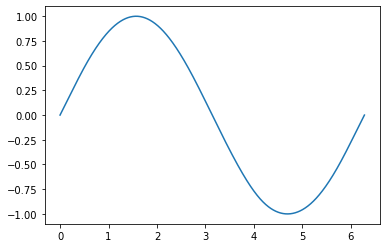

In [70]:
X  = np.linspace(x[0], x[n], 1000)
y3 = Spline_3(X)

plt.plot(X, y3)
plt.show()

## Kết quả thử nghiệm

S1[0.0, 0.52] = 0.0(0.52-x)+0.962(x-0.0)
S1[0.52, 1.05] = 0.943(1.05-x)+1.642(x-0.52)
S1[1.05, 1.57] = 1.673(1.57-x)+1.923(x-1.05)
S1[1.57, 2.09] = 1.923(2.09-x)+1.673(x-1.57)
S1[2.09, 2.62] = 1.642(2.62-x)+0.943(x-2.09)
S1[2.62, 3.14] = 0.962(3.14-x)+0.0(x-2.62)
S1[3.14, 3.66] = 0.0(3.66-x)+-0.962(x-3.14)
S1[3.66, 4.17] = -0.98(4.17-x)+-1.706(x-3.66)
S1[4.17, 4.71] = -1.611(4.71-x)+-1.852(x-4.17)
S1[4.71, 5.23] = -1.923(5.23-x)+-1.673(x-4.71)
S1[5.23, 5.76] = -1.642(5.76-x)+-0.943(x-5.23)
S1[5.76, 6.28] = -0.962(6.28-x)+0.0(x-5.76)
S2[0.0, 0.52] = -0.925(0.52-x)^2+0.925(x-0.0)^2+0.25
S2[0.52, 1.05] = -0.907(1.05-x)^2+0.41(x-0.52)^2+0.755
S2[1.05, 1.57] = -0.418(1.57-x)^2+0.063(x-1.05)^2+0.983
S2[1.57, 2.09] = -0.063(2.09-x)^2+-0.544(x-1.57)^2+1.017
S2[2.09, 2.62] = 0.533(2.62-x)^2+-0.784(x-2.09)^2+0.72
S2[2.62, 3.14] = 0.799(3.14-x)^2+-1.05(x-2.62)^2+0.284
S2[3.14, 3.66] = 1.05(3.66-x)^2+-0.799(x-3.14)^2+-0.284
S2[3.66, 4.17] = 0.815(4.17-x)^2+-0.608(x-3.66)^2+-0.712
S2[4.17, 4.71] = 

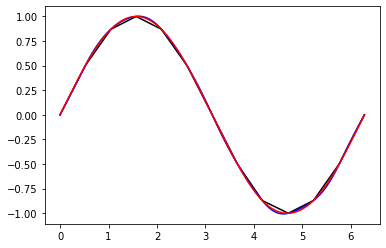

In [76]:
X  = np.linspace(x[0], x[n], 1000)
y1 = Spline_1(X)
y2 = Spline_2(X)
y3 = Spline_3(X)

plt.plot(X, y1, 'black')
plt.plot(X, y2, 'blue')
plt.plot(X, y3, 'red')

plt.show()